In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

import os
imgdir = 'output_images'
if not os.path.isdir(imgdir):
    os.mkdir(imgdir)

brands = ['Gummies', 'Sugar Buns', 'Sparkle Pop', 'Candys', 'Garlic Bombs', 'Snackmonds', 'Caffeinos', 'moon drops']
spend_types = ['Trade', 'Search', 'Display', 'TV', 'Radio']
num_brands, num_types = len(brands), len(spend_types)

In [2]:
np.random.seed(1)

In [3]:
import tqdm
try:
    tqdm_disp = tqdm.tqdm_notebook if get_ipython(
    ).__class__.__name__ == 'ZMQInteractiveShell' else tqdm.tqdm
except NameError:
    tqdm_disp = tqdm.tqdm

In [4]:
num_promos = 40000
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2018-06-01')
dates = pd.date_range(start_date, end_date)
num_dates = len(dates)

In [5]:
promo = pd.DataFrame(
    {'Brand':np.random.choice(brands, num_promos),
     'Type':np.random.choice(spend_types, num_promos), 
     'Spend':np.random.rand(num_promos) * 500,
     'date' : np.random.choice(dates, num_promos)})
promo = promo.groupby(['Brand', 'Type', 'date'])['Spend'].sum().to_frame()
promo = promo.unstack(fill_value=0).stack()
promo.shape

(35320, 1)

In [6]:
promo.iloc[np.random.choice(promo.shape[0], (promo.shape[0]*99)//100, replace=False)] = 0

In [7]:
initial_promo = promo.copy()

In [8]:
promo.shape, promo.rolling(40).mean().shape

((35320, 1), (35320, 1))

In [9]:
# for _ in range(10):
#     promo.iloc[10:] = promo.iloc[10:] + promo.iloc[:-10]

In [10]:

# promo = pd.concat([promo, initial_promo], axis=1).min(1).to_frame()
promo = promo.rolling(10).max().fillna(0)
promo = promo + np.random.rand(promo.shape[0]) * 20

In [11]:
promo

Spend
Brand      Type    date             
Caffeinos  Display 2016-01-01    0.0
                   2016-01-02    0.0
                   2016-01-03    0.0
                   2016-01-04    0.0
                   2016-01-05    0.0
                   2016-01-06    0.0
                   2016-01-07    0.0
                   2016-01-08    0.0
                   2016-01-09    0.0
                   2016-01-10    0.0
                   2016-01-11    0.0
                   2016-01-12    0.0
                   2016-01-13    0.0
                   2016-01-14    0.0
                   2016-01-15    0.0
                   2016-01-16    0.0
                   2016-01-17    0.0
                   2016-01-18    0.0
                   2016-01-19    0.0
                   2016-01-20    0.0
                   2016-01-21    0.0
                   2016-01-22    0.0
                   2016-01-23    0.0
                   2016-01-24    0.0
                   2016-01-25    0.0
                   2016-01-26    0.0
                   2016-01-27    0.0
                   2016-01-28    0.0
                   2016-01-29    0.0
                   2016-01-30    0.0
...                              ...
moon drops Trade   2018-05-03    0.0
                   2018-05-04    0.0
                   2018-05-05    0.0
                   2018-05-06    0.0
                   2018-05-07    0.0
                   2018-05-08    0.0
                   2018-05-09    0.0
                   2018-05-10    0.0
                   2018-05-11    0.0
                   2018-05-12    0.0
                   2018-05-13    0.0
                   2018-05-14    0.0
                   2018-05-15    0.0
                   2018-05-16    0.0
                   2018-05-17    0.0
                   2018-05-18    0.0
                   2018-05-19    0.0
                   2018-05-20    0.0
                   2018-05-21    0.0
                   2018-05-22    0.0
                   2018-05-23    0.0
                   2018-05-24    0.0
                   2018-05-25    0.0
                   2018-05-26    0.0
                   2018-05-27    0.0
                   2018-05-28    0.0
                   2018-05-29    0.0
                   2018-05-30    0.0
                   2018-05-31    0.0
                   2018-06-01    0.0

[35320 rows x 1 columns]

In [12]:
assert(promo.shape[0] == num_brands * num_types * num_dates)

In [13]:
num_brands * num_types * num_dates

35320

In [14]:
true_baselines = {brand: [np.random.randn() * 100 + 1000] for brand in brands}

In [15]:
spend_rois = {t : [np.random.rand()+.8] for t in spend_types}
brand_rois = {t : [np.random.rand()/3] for t in brands}

In [16]:
brand_spend_combos = pd.DataFrame(
    data=np.random.rand(num_brands, num_types) - .5, index=brands, columns = spend_types)

In [17]:
brand_spend_combos  = brand_spend_combos + \
    pd.DataFrame(brand_rois, index=spend_rois).T + pd.DataFrame(spend_rois, index = brands)

In [18]:
brand_spend_combos

,Trade,Search,Display,TV,Radio
Gummies,1.130839,0.851310,1.550715,1.701484,1.104891
Sugar Buns,1.093347,1.356464,1.641953,1.575130,1.321722
Sparkle Pop,1.726526,1.454727,0.901080,1.669049,0.912634
Candys,1.625703,0.792707,0.806164,2.172959,1.686997
Garlic Bombs,1.359517,1.503374,1.455023,1.361436,1.479635
Snackmonds,1.441968,1.519874,1.466318,1.848150,0.839512
Caffeinos,0.959376,1.053272,1.017465,1.310228,0.865119
moon drops,1.520391,1.387922,0.948384,1.531096,0.771152


In [19]:
promo2 = promo.unstack(1)

In [20]:
promo2.columns = promo2.columns.droplevel(0)
promo2 = promo2.reset_index(1)

In [21]:
effect = promo2.copy()
effect[effect.columns[1:]] = effect[effect.columns[1:]] * brand_spend_combos
effect = effect.reset_index().set_index(['Brand', 'date'])
effect = effect.sum(1).to_frame(name='spend').unstack(0)
effect.columns = effect.columns.droplevel(0)

In [22]:
effect.head()

Brand,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
date,,,,,,,,
2016-01-01,0.0,0.0,1120.95448,0.0,0.0,0.0,0.0,0.000000
2016-01-02,0.0,0.0,1120.95448,0.0,0.0,0.0,0.0,0.000000
2016-01-03,0.0,0.0,1120.95448,0.0,0.0,0.0,0.0,0.000000
2016-01-04,0.0,0.0,1120.95448,0.0,0.0,0.0,0.0,0.000000
2016-01-05,0.0,0.0,1120.95448,0.0,0.0,0.0,0.0,21.261385


In [23]:
salesnoise = pd.DataFrame(data = np.random.rand(num_dates, num_brands) * (-30), columns= brands, index=dates)
salesnoise.head()

,Gummies,Sugar Buns,Sparkle Pop,Candys,Garlic Bombs,Snackmonds,Caffeinos,moon drops
2016-01-01,-0.646864,-0.326671,-0.629807,-0.842924,-0.516994,-0.375346,-0.454505,-0.360834
2016-01-02,-0.399191,-0.746380,-0.973512,-0.280984,-0.013404,-0.936076,-0.472202,-0.945166
2016-01-03,-0.630148,-0.081329,-0.572701,-0.048040,-0.755207,-0.707341,-0.149314,-0.217272
2016-01-04,-0.272788,-0.682536,-0.388003,-0.612744,-0.670112,-0.115167,-0.972445,-0.342542
2016-01-05,-0.904775,-0.044245,-0.392038,-0.874453,-0.082838,-0.694944,-0.771688,-0.130534


In [24]:
seasonal_effects = pd.DataFrame(
    {brand: {'cos':np.random.randn() * 300, 'sin':np.random.randn()*300} for brand in brands})

In [25]:
seasonal_effects

,Gummies,Sugar Buns,Sparkle Pop,Candys,Garlic Bombs,Snackmonds,Caffeinos,moon drops
cos,198.953594,-19.778584,489.766140,329.894459,-477.855122,-497.748163,-162.695795,-93.016692
sin,-418.059746,-237.561523,-382.764953,204.783989,26.196887,338.668556,-182.851165,482.786512


In [26]:
seasonal_effects.T

,cos,sin
Gummies,198.953594,-418.059746
Sugar Buns,-19.778584,-237.561523
Sparkle Pop,489.766140,-382.764953
Candys,329.894459,204.783989
Garlic Bombs,-477.855122,26.196887
Snackmonds,-497.748163,338.668556
Caffeinos,-162.695795,-182.851165
moon drops,-93.016692,482.786512


In [27]:
brand_spend_combos

,Trade,Search,Display,TV,Radio
Gummies,1.130839,0.851310,1.550715,1.701484,1.104891
Sugar Buns,1.093347,1.356464,1.641953,1.575130,1.321722
Sparkle Pop,1.726526,1.454727,0.901080,1.669049,0.912634
Candys,1.625703,0.792707,0.806164,2.172959,1.686997
Garlic Bombs,1.359517,1.503374,1.455023,1.361436,1.479635
Snackmonds,1.441968,1.519874,1.466318,1.848150,0.839512
Caffeinos,0.959376,1.053272,1.017465,1.310228,0.865119
moon drops,1.520391,1.387922,0.948384,1.531096,0.771152


In [28]:
brand_spend_combos_with_seasonality = brand_spend_combos.join(seasonal_effects.T)

In [29]:
seasonal = salesnoise.index.dayofyear

seasonal_sine, seasonal_cos = np.sin(seasonal*2*np.pi/365), np.cos(seasonal*2*np.pi/365)

In [30]:
seasonal_effects = seasonal_effects[effect.columns]

In [31]:
seasonal_effects.loc[['cos'],:].values * np.expand_dims(seasonal_cos.values, 1)

array([[-162.67169009,  329.84558202, -477.78432278, ...,  489.69357593,
         -19.77565391,  -93.00291091],
       [-162.59938182,  329.69896423, -477.57194558, ...,  489.47590502,
         -19.76686355,  -92.96157072],
       [-162.47889184,  329.45464952, -477.2180535 , ...,  489.11319183,
         -19.75221583,  -92.892684  ],
       ...,
       [ 137.89134444, -279.59905461,  405.00177125, ..., -415.09684636,
          16.76315961,   78.83545327],
       [ 139.35724543, -282.57142778,  409.30728079, ..., -419.50967504,
          16.9413661 ,   79.67354046],
       [ 140.78185187, -285.46006893,  413.49150375, ..., -423.79819395,
          17.11455249,   80.48801866]])

In [32]:
seasonal_effects.loc[['cos'],:]

,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
cos,-162.695795,329.894459,-477.855122,198.953594,-497.748163,489.76614,-19.778584,-93.016692


In [33]:
seasonal_impact = seasonal_effects.loc[['cos'],:].values * np.expand_dims(seasonal_cos.values, 1) + \
    seasonal_effects.loc[['sin'],:].values * np.expand_dims(seasonal_sine.values, 1)

In [34]:
total_sales = effect + salesnoise + pd.DataFrame(true_baselines).iloc[0,:] + seasonal_impact

In [35]:
# total_sales = pd.DataFrame(
#     data=total_sales.values + np.expand_dims(sine.values, 1) + np.expand_dims(cos.values, 1),
#     index=total_sales.index, columns=total_sales.columns)

In [36]:
total_sales.head()

,Caffeinos,Candys,Garlic Bombs,Gummies,Snackmonds,Sparkle Pop,Sugar Buns,moon drops
date,,,,,,,,
2016-01-01,686.828672,1415.478614,1518.333720,1144.123312,597.405005,1493.346736,1019.325843,909.024192
2016-01-02,683.736735,1419.417912,1519.500489,1137.088484,602.893389,1486.198643,1014.826905,916.789114
2016-01-03,681.035428,1422.928428,1519.563114,1129.520370,609.315188,1479.653927,1011.421008,925.888884
2016-01-04,677.239046,1425.540539,1520.593646,1122.488093,616.242544,1472.754020,1006.758339,934.155632
2016-01-05,674.518375,1428.353946,1522.267086,1114.416177,622.138188,1465.528398,1003.345858,964.038697


In [37]:
total_sales = total_sales.stack().to_frame(name='sales')

In [38]:
total_sales.head()

sales
date                                
2016-01-01 Caffeinos      686.828672
           Candys        1415.478614
           Garlic Bombs  1518.333720
           Gummies       1144.123312
           Snackmonds     597.405005

In [39]:
promo_viewed = promo.unstack(1)
promo_viewed.columns = promo_viewed.columns.droplevel(0)
promo_viewed = promo_viewed.reset_index().sort_values('date').set_index(['date', 'Brand'])
promo_viewed.head(10)

Type                     Display  Radio      Search          TV  Trade
date       Brand                                                      
2016-01-01 Caffeinos         0.0    0.0    0.000000    0.000000    0.0
           Snackmonds        0.0    0.0    0.000000    0.000000    0.0
           Garlic Bombs      0.0    0.0  431.335684  347.056882    0.0
           Sparkle Pop       0.0    0.0    0.000000    0.000000    0.0
           Sugar Buns        0.0    0.0    0.000000    0.000000    0.0
           Candys            0.0    0.0    0.000000    0.000000    0.0
           moon drops        0.0    0.0    0.000000    0.000000    0.0
           Gummies           0.0    0.0    0.000000    0.000000    0.0
2016-01-02 moon drops        0.0    0.0    0.000000    0.000000    0.0
           Snackmonds        0.0    0.0    0.000000    0.000000    0.0

In [40]:
total_sales = total_sales - total_sales.min()
#total_sales = total_sales * 1000 / total_sales.max()

In [41]:
sales_viewed = total_sales.clip(0, np.inf)

In [42]:
data_viewed = promo_viewed.join(sales_viewed, on=['date', 'Brand'])

In [43]:
data_viewed.round(2).head(10)

Display  Radio  Search      TV  Trade    sales
date       Brand                                                       
2016-01-01 Caffeinos         0.0    0.0    0.00    0.00    0.0   298.27
           Snackmonds        0.0    0.0    0.00    0.00    0.0   208.85
           Garlic Bombs      0.0    0.0  431.34  347.06    0.0  1129.78
           Sparkle Pop       0.0    0.0    0.00    0.00    0.0  1104.79
           Sugar Buns        0.0    0.0    0.00    0.00    0.0   630.77
           Candys            0.0    0.0    0.00    0.00    0.0  1026.92
           moon drops        0.0    0.0    0.00    0.00    0.0   520.47
           Gummies           0.0    0.0    0.00    0.00    0.0   755.57
2016-01-02 moon drops        0.0    0.0    0.00    0.00    0.0   528.23
           Snackmonds        0.0    0.0    0.00    0.00    0.0   214.34

In [44]:
sales_viewed.head(10)

sales
date                                
2016-01-01 Caffeinos      298.273435
           Candys        1026.923377
           Garlic Bombs  1129.778483
           Gummies        755.568075
           Snackmonds     208.849768
           Sparkle Pop   1104.791499
           Sugar Buns     630.770606
           moon drops     520.468955
2016-01-02 Caffeinos      295.181498
           Candys        1030.862675

In [45]:
spend = data_viewed.drop('sales', 1)
Yraw = data_viewed[['sales']]
spend.head(10)

Display  Radio      Search          TV  Trade
date       Brand                                                      
2016-01-01 Caffeinos         0.0    0.0    0.000000    0.000000    0.0
           Snackmonds        0.0    0.0    0.000000    0.000000    0.0
           Garlic Bombs      0.0    0.0  431.335684  347.056882    0.0
           Sparkle Pop       0.0    0.0    0.000000    0.000000    0.0
           Sugar Buns        0.0    0.0    0.000000    0.000000    0.0
           Candys            0.0    0.0    0.000000    0.000000    0.0
           moon drops        0.0    0.0    0.000000    0.000000    0.0
           Gummies           0.0    0.0    0.000000    0.000000    0.0
2016-01-02 moon drops        0.0    0.0    0.000000    0.000000    0.0
           Snackmonds        0.0    0.0    0.000000    0.000000    0.0

In [46]:
seasonal_X = spend.reset_index()['date'].dt.dayofyear

sine_X, cos_X = np.sin(seasonal_X*2*np.pi/365), np.cos(seasonal_X*2*np.pi/365)
#sine_X = sine_X.to_frame('sine')
#cos_X = cos_X.to_frame('cos')

In [47]:
dummies = pd.get_dummies(spend.reset_index()['Brand'])
dummies = dummies.set_index(spend.index)

In [48]:

spend['cos'] = cos_X.values
spend['sin'] = sine_X.values

In [49]:
spend.reset_index().groupby('date')[['cos', 'sin']].max().head(10)

,cos,sin
date,,
2016-01-01,0.999852,0.017213
2016-01-02,0.999407,0.034422
2016-01-03,0.998667,0.051620
2016-01-04,0.997630,0.068802
2016-01-05,0.996298,0.085965
2016-01-06,0.994671,0.103102
2016-01-07,0.992749,0.120208
2016-01-08,0.990532,0.137279
2016-01-09,0.988023,0.154309


In [50]:
spend.reset_index().set_index('date')['Brand'].to_frame().head()

,Brand
date,
2016-01-01,Caffeinos
2016-01-01,Snackmonds
2016-01-01,Garlic Bombs
2016-01-01,Sparkle Pop
2016-01-01,Sugar Buns


In [51]:
def color_background(val):
    color = '' if val < 1 else 'lightgreen'
    return 'background-color: ' + color
def color_number(val):
    color = 'red' if val < 1 else ''
    return 'color: %s' % color

In [52]:
dummies.head().style.applymap(color_background).applymap(color_number)

In [53]:
dummies.head()

Caffeinos  Candys  Garlic Bombs  Gummies  Snackmonds  \
date       Brand                                                                
2016-01-01 Caffeinos             1       0             0        0           0   
           Snackmonds            0       0             0        0           1   
           Garlic Bombs          0       0             1        0           0   
           Sparkle Pop           0       0             0        0           0   
           Sugar Buns            0       0             0        0           0   

                         Sparkle Pop  Sugar Buns  moon drops  
date       Brand                                              
2016-01-01 Caffeinos               0           0           0  
           Snackmonds              0           0           0  
           Garlic Bombs            0           0           0  
           Sparkle Pop             1           0           0  
           Sugar Buns              0           1           0

In [54]:
dummy_spends = {}
for dummy in dummies.columns:
    brand_spend = pd.DataFrame(
        dummies[dummy].to_frame().values * spend.values, 
        index=spend.index, columns=['type:' + c + '_brand:' + dummy for c in spend.columns])
    dummy_spends[dummy] = brand_spend

In [55]:
Xraw = pd.concat((spend, dummies, *list(dummy_spends.values())), 1)

In [56]:
Xraw.head(10).tail(5).round()

Display  Radio  Search   TV  Trade  cos  sin  \
date       Brand                                                      
2016-01-01 Candys          0.0    0.0     0.0  0.0    0.0  1.0  0.0   
           moon drops      0.0    0.0     0.0  0.0    0.0  1.0  0.0   
           Gummies         0.0    0.0     0.0  0.0    0.0  1.0  0.0   
2016-01-02 moon drops      0.0    0.0     0.0  0.0    0.0  1.0  0.0   
           Snackmonds      0.0    0.0     0.0  0.0    0.0  1.0  0.0   

                       Caffeinos  Candys  Garlic Bombs  \
date       Brand                                         
2016-01-01 Candys              0       1             0   
           moon drops          0       0             0   
           Gummies             0       0             0   
2016-01-02 moon drops          0       0             0   
           Snackmonds          0       0             0   

                                 ...              type:Trade_brand:Sugar Buns  \
date       Brand                 ...                                            
2016-01-01 Candys                ...                                      0.0   
           moon drops            ...                                      0.0   
           Gummies               ...                                      0.0   
2016-01-02 moon drops            ...                                      0.0   
           Snackmonds            ...                                      0.0   

                       type:cos_brand:Sugar Buns  type:sin_brand:Sugar Buns  \
date       Brand                                                              
2016-01-01 Candys                            0.0                        0.0   
           moon drops                        0.0                        0.0   
           Gummies                           0.0                        0.0   
2016-01-02 moon drops                        0.0                        0.0   
           Snackmonds                        0.0                        0.0   

                       type:Display_brand:moon drops  \
date       Brand                                       
2016-01-01 Candys                                0.0   
           moon drops                            0.0   
           Gummies                               0.0   
2016-01-02 moon drops                            0.0   
           Snackmonds                            0.0   

                       type:Radio_brand:moon drops  \
date       Brand                                     
2016-01-01 Candys                              0.0   
           moon drops                          0.0   
           Gummies                             0.0   
2016-01-02 moon drops                          0.0   
           Snackmonds                          0.0   

                       type:Search_brand:moon drops  type:TV_brand:moon drops  \
date       Brand                                                                
2016-01-01 Candys                               0.0                       0.0   
           moon drops                           0.0                       0.0   
           Gummies                              0.0                       0.0   
2016-01-02 moon drops                           0.0                       0.0   
           Snackmonds                           0.0                       0.0   

                       type:Trade_brand:moon drops  type:cos_brand:moon drops  \
date       Brand                                                                
2016-01-01 Candys                              0.0                        0.0   
           moon drops                          0.0                        1.0   
           Gummies                             0.0                        0.0   
2016-01-02 moon drops                          0.0                        1.0   
           Snackmonds                          0.0                        0.0   

                       type:sin_brand:moon drops  
date       Brand                     

In [57]:
xmeans, xstds = Xraw.mean(), Xraw.std()
ymeans, ystds = Yraw.mean(), Yraw.std()

In [58]:
xstds[spend.columns] = xstds[spend.columns] / 10
for col in xstds.index:
    if 'sin_' in col or 'cos_' in col:
        xstds[col] = xstds[col] / 10


In [59]:
xstds[brands] = xstds[brands] / 100

In [60]:
X = (Xraw - xmeans) / xstds
Y = (Yraw - ymeans)/ystds

In [61]:
X.round(2).head()

Display  Radio  Search     TV  Trade    cos  sin  \
date       Brand                                                            
2016-01-01 Caffeinos       -2.36  -2.15   -2.48  -2.02  -1.89  13.88 -1.5   
           Snackmonds      -2.36  -2.15   -2.48  -2.02  -1.89  13.88 -1.5   
           Garlic Bombs    -2.36  -2.15   31.05  21.87  -1.89  13.88 -1.5   
           Sparkle Pop     -2.36  -2.15   -2.48  -2.02  -1.89  13.88 -1.5   
           Sugar Buns      -2.36  -2.15   -2.48  -2.02  -1.89  13.88 -1.5   

                         Caffeinos  Candys  Garlic Bombs  \
date       Brand                                           
2016-01-01 Caffeinos        264.56  -37.79        -37.79   
           Snackmonds       -37.79  -37.79        -37.79   
           Garlic Bombs     -37.79  -37.79        264.56   
           Sparkle Pop      -37.79  -37.79        -37.79   
           Sugar Buns       -37.79  -37.79        -37.79   

                                   ...              \
date       Brand                   ...               
2016-01-01 Caffeinos               ...               
           Snackmonds              ...               
           Garlic Bombs            ...               
           Sparkle Pop             ...               
           Sugar Buns              ...               

                         type:Trade_brand:Sugar Buns  \
date       Brand                                       
2016-01-01 Caffeinos                           -0.05   
           Snackmonds                          -0.05   
           Garlic Bombs                        -0.05   
           Sparkle Pop                         -0.05   
           Sugar Buns                          -0.05   

                         type:cos_brand:Sugar Buns  type:sin_brand:Sugar Buns  \
date       Brand                                                                
2016-01-01 Caffeinos                         -0.17                      -0.61   
           Snackmonds                        -0.17                      -0.61   
           Garlic Bombs                      -0.17                      -0.61   
           Sparkle Pop                       -0.17                      -0.61   
           Sugar Buns                        40.39                       0.07   

                         type:Display_brand:moon drops  \
date       Brand                                         
2016-01-01 Caffeinos                              -0.1   
           Snackmonds                             -0.1   
           Garlic Bombs                           -0.1   
           Sparkle Pop                            -0.1   
           Sugar Buns                             -0.1   

                         type:Radio_brand:moon drops  \
date       Brand                                       
2016-01-01 Caffeinos                           -0.06   
           Snackmonds                          -0.06   
           Garlic Bombs                        -0.06   
           Sparkle Pop                         -0.06   
           Sugar Buns                          -0.06   

                         type:Search_brand:moon drops  \
date       Brand                                        
2016-01-01 Caffeinos                            -0.08   
           Snackmonds                           -0.08   
           Garlic Bombs                         -0.08   
           Sparkle Pop                          -0.08   
           Sugar Buns                           -0.08   

                         type:TV_brand:moon drops  \
date       Brand                                    
2016-01-01 Caffeinos                        -0.05   
           Snackmonds                       -0.05   
           Garlic Bombs                     -0.05   
           Sparkle Pop                      -0.05   
           Sugar Buns                       -0.05   

                         type:Trade_brand:moon drops  \
date       Brand                                       
2016-01-01 Caffeinos                    

In [62]:
clf = Ridge(1e-5).fit(X, Y)

In [63]:
import tensorflow as tf
lr = tf.placeholder(tf.float32, ())
x_in = tf.placeholder(tf.float32, (None, X.shape[1]))
y_in = tf.placeholder(tf.float32, (None))
w = tf.Variable(np.random.randn(X.shape[1]), dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)
yhat = tf.reduce_sum(x_in * tf.expand_dims(w, 0)) + b
loss = tf.reduce_mean(tf.square(y_in-yhat)) + 1e-15 * (tf.reduce_sum(tf.square(w)))

In [64]:
# optim = tf.train.AdamOptimizer(lr).minimize(loss)

# feed_dict = {
#     x_in:X, y_in:Y
# }

# s = tf.Session()
# s.run(tf.global_variables_initializer())
# for i in range(1000):
#     feed_dict[lr] = 1e0/np.sqrt(i+1)
#     l, _ = s.run([loss, optim], feed_dict)
#     if i % 100 == 0:
#         print(l)

In [65]:
# optim = tf.contrib.opt.ScipyOptimizerInterface(
#         loss, tol=0
#     )
# feed_dict = {
#     x_in:X, y_in:Y
# }

# s = tf.Session()
# s.run(tf.global_variables_initializer())

# with tqdm_disp() as tq:
#     y_hat_trace = []

#     def loss_callback(y_hat, loss):
#         y_hat_trace.append(y_hat)
#         tq.update()
#         tq.set_postfix_str('loss = %.6f' % (loss))

#     optim.minimize(
#         s,
#         feed_dict=feed_dict,
#         fetches=[yhat, loss],
#         loss_callback=loss_callback,
#     )
#     y_hat = y_hat_trace[-1]

In [66]:
#s.run(loss, feed_dict)

In [67]:
#coef_tf = s.run(w)

In [68]:
clf.coef_

array([[ 3.08279267e-02,  2.51856297e-02,  3.10739552e-02,
         4.63794828e-02,  3.12933890e-02, -1.93751555e-03,
        -1.44526392e-03, -8.41110781e-04,  6.14334868e-04,
        -7.01054996e-04, -2.08250530e-04,  6.56652119e-04,
         1.57976077e-04,  3.64532147e-04,  5.16343337e-05,
        -1.82758180e-02, -2.19137040e-02, -1.35221957e-02,
        -2.77927670e-02, -1.94443236e-02, -6.99240705e-03,
        -8.33794307e-03, -2.33999860e-02,  4.04312612e-02,
        -4.55679854e-02,  5.94971578e-02,  2.19133014e-02,
         1.62540345e-02,  1.04377202e-02,  2.58784880e-02,
         3.43836560e-02,  2.34261097e-02, -3.72711057e-02,
         5.76726084e-03, -2.18644367e-02,  1.78594072e-03,
         1.39615004e-02, -5.78027213e-04, -3.14480360e-02,
         3.58998388e-03, -1.75423108e-02,  1.00760416e-02,
        -1.97311631e-02,  3.00859219e-03, -1.93712849e-02,
         2.94444353e-02,  1.81830336e-02,  8.16810198e-03,
        -2.28047519e-02,  1.69219040e-02, -2.87418017e-0

In [69]:
coef = clf.coef_ / xstds.values * ystds.values
#coef = (np.expand_dims(coef_tf, 0) / xstds.values) * ystds.values

In [70]:
display = pd.DataFrame(coef, columns=X.columns)

In [71]:
aggregated = spend.columns
bias = dummies.columns
deltas = np.array([col for col in X.columns if col not in aggregated and col not in bias])

In [72]:
results = pd.DataFrame(
    data=np.zeros((num_brands+1, spend.columns.shape[0]+1)), 
    index=['aggregated'] + brands, columns = ['bias'] + list(spend.columns))

In [73]:
results

,bias,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gummies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sugar Buns,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sparkle Pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Candys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Garlic Bombs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Snackmonds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Caffeinos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
moon drops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
results.loc[['aggregated'], aggregated]


,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
display[aggregated]

,Display,Radio,Search,TV,Trade,cos,sin
0,1.267181,1.110272,1.261616,1.667604,1.315835,-14.529544,-10.688838


In [76]:
display

,Display,Radio,Search,TV,Trade,cos,sin,Caffeinos,Candys,Garlic Bombs,...,type:Trade_brand:Sugar Buns,type:cos_brand:Sugar Buns,type:sin_brand:Sugar Buns,type:Display_brand:moon drops,type:Radio_brand:moon drops,type:Search_brand:moon drops,type:TV_brand:moon drops,type:Trade_brand:moon drops,type:cos_brand:moon drops,type:sin_brand:moon drops
0,1.267181,1.110272,1.261616,1.667604,1.315835,-14.529544,-10.688838,-132.831514,97.018173,-110.713355,...,-0.222611,-5.261981,-226.859242,-0.318876,-0.339008,0.126104,-0.136504,0.204532,-78.463734,493.475671


In [77]:
display['type:Display_brand:Gummies']

0    0.283524
Name: type:Display_brand:Gummies, dtype: float64

In [78]:
results.loc[['aggregated'], aggregated] = display[aggregated].values
for brand in brands:
    results.loc[brand, 'bias'] = display[brand].values
    results.loc[brand, aggregated] = display.loc[:,[b for b in deltas if brand in b]].values + display[aggregated].values

In [79]:
results

,bias,Display,Radio,Search,TV,Trade,cos,sin
aggregated,0.000000,1.267181,1.110272,1.261616,1.667604,1.315835,-14.529544,-10.688838
Gummies,-32.887741,1.550705,1.104969,0.851122,1.701544,1.130842,198.978510,-418.060331
Sugar Buns,57.568347,1.642038,1.321832,1.356541,1.575283,1.093224,-19.791525,-237.548079
Sparkle Pop,24.948202,0.901035,0.912526,1.454676,1.669041,1.726781,489.787460,-382.777367
Candys,97.018173,0.806330,1.686906,0.792627,2.172993,1.625776,329.888177,204.809337
Garlic Bombs,-110.713355,1.455005,1.479617,1.503428,1.361438,1.359594,-477.829871,26.183866
Snackmonds,103.701079,1.465716,0.839658,1.519848,1.848084,1.441903,-497.754844,338.682421
Caffeinos,-132.831514,1.017392,0.865021,1.053241,1.310231,0.959369,-162.696383,-182.834813
moon drops,8.154297,0.948305,0.771264,1.387720,1.531100,1.520367,-92.993278,482.786833


In [80]:
import calendar

In [81]:
def add_month(df):
    df = df.copy()

    df['phase'] = np.angle((
            df['sin'] * 1j + df['cos']).astype(complex))
    df['peak_month'] = ((
            (df['phase'] * 12 / 2 / np.pi)) % 12).round().astype(int)
    df.loc[df['peak_month'] == 0, 'peak_month'] = 12
    df['peak_month'] = df['peak_month'].apply(
        lambda x: calendar.month_abbr[x])
    df['seasonal_impact'] = np.sqrt(
        (np.square(df['sin']) + np.square(
            df['cos'])).astype('float'))
    df['seasonal_impact'] = (df[
        'seasonal_impact'] - df['seasonal_impact'].min()) / df['seasonal_impact'].std() + 0.1
    return df

In [82]:
groundtruth = add_month(brand_spend_combos_with_seasonality)
results2 = add_month(results)

In [83]:
groundtruth[list(aggregated) + ['peak_month', 'seasonal_impact']].round(2)

,Display,Radio,Search,TV,Trade,cos,sin,peak_month,seasonal_impact
Gummies,1.55,1.10,0.85,1.70,1.13,198.95,-418.06,Oct,1.66
Sugar Buns,1.64,1.32,1.36,1.58,1.09,-19.78,-237.56,Sep,0.10
Sparkle Pop,0.90,0.91,1.45,1.67,1.73,489.77,-382.76,Nov,2.76
Candys,0.81,1.69,0.79,2.17,1.63,329.89,204.78,Jan,1.14
Garlic Bombs,1.46,1.48,1.50,1.36,1.36,-477.86,26.20,Jun,1.77
Snackmonds,1.47,0.84,1.52,1.85,1.44,-497.75,338.67,May,2.62
Caffeinos,1.02,0.87,1.05,1.31,0.96,-162.70,-182.85,Aug,0.14
moon drops,0.95,0.77,1.39,1.53,1.52,-93.02,482.79,Mar,1.86


In [84]:
display[[col for col in display.columns if 'sin' in col and 'Cand' in col]]

,type:sin_brand:Candys
0,215.498175


In [85]:
results2[list(aggregated) + ['peak_month', 'seasonal_impact']].round(2)

,Display,Radio,Search,TV,Trade,cos,sin,peak_month,seasonal_impact
aggregated,1.27,1.11,1.26,1.67,1.32,-14.53,-10.69,Jul,0.10
Gummies,1.55,1.10,0.85,1.70,1.13,198.98,-418.06,Oct,2.38
Sugar Buns,1.64,1.32,1.36,1.58,1.09,-19.79,-237.55,Sep,1.23
Sparkle Pop,0.90,0.91,1.45,1.67,1.73,489.79,-382.78,Nov,3.19
Candys,0.81,1.69,0.79,2.17,1.63,329.89,204.81,Jan,2.00
Garlic Bombs,1.46,1.48,1.50,1.36,1.36,-477.83,26.18,Jun,2.46
Snackmonds,1.47,0.84,1.52,1.85,1.44,-497.75,338.68,May,3.09
Caffeinos,1.02,0.87,1.05,1.31,0.96,-162.70,-182.83,Aug,1.26
moon drops,0.95,0.77,1.39,1.53,1.52,-92.99,482.79,Mar,2.53


In [86]:
display_aggregated = display.rename({col: 'aggregated:'+col for col in spend.columns}, axis=1)

In [87]:
display_aggregated

,aggregated:Display,aggregated:Radio,aggregated:Search,aggregated:TV,aggregated:Trade,aggregated:cos,aggregated:sin,Caffeinos,Candys,Garlic Bombs,...,type:Trade_brand:Sugar Buns,type:cos_brand:Sugar Buns,type:sin_brand:Sugar Buns,type:Display_brand:moon drops,type:Radio_brand:moon drops,type:Search_brand:moon drops,type:TV_brand:moon drops,type:Trade_brand:moon drops,type:cos_brand:moon drops,type:sin_brand:moon drops
0,1.267181,1.110272,1.261616,1.667604,1.315835,-14.529544,-10.688838,-132.831514,97.018173,-110.713355,...,-0.222611,-5.261981,-226.859242,-0.318876,-0.339008,0.126104,-0.136504,0.204532,-78.463734,493.475671


In [88]:
X.columns.shape

(71,)

In [89]:
data_viewed.head()

Display  Radio      Search          TV  Trade  \
date       Brand                                                         
2016-01-01 Caffeinos         0.0    0.0    0.000000    0.000000    0.0   
           Snackmonds        0.0    0.0    0.000000    0.000000    0.0   
           Garlic Bombs      0.0    0.0  431.335684  347.056882    0.0   
           Sparkle Pop       0.0    0.0    0.000000    0.000000    0.0   
           Sugar Buns        0.0    0.0    0.000000    0.000000    0.0   

                               sales  
date       Brand                      
2016-01-01 Caffeinos      298.273435  
           Snackmonds     208.849768  
           Garlic Bombs  1129.778483  
           Sparkle Pop   1104.791499  
           Sugar Buns     630.770606

In [90]:
def view_brand(df, b):
    plt.figure(figsize=(15, 10))
    brand = data_viewed.query('Brand == "' + b + '"')
    x = brand.reset_index()['date']
    for spend in brand.columns:
        vals = brand[spend]
        vals = vals - vals.min()
        vals = vals/vals.max()
        plt.plot(x, vals, label=spend)
    sin = np.sin(x.dt.dayofyear * 2 * np.pi/365)
    cos = np.cos(x.dt.dayofyear * 2 * np.pi/365)
    sin, cos = sin - sin.min(), cos - cos.min()
    sin, cos = sin/sin.max(), cos/cos.max()
    plt.plot(x, sin, label='sine')
    plt.plot(x, cos, label='cos')
    plt.legend()
    plt.show()


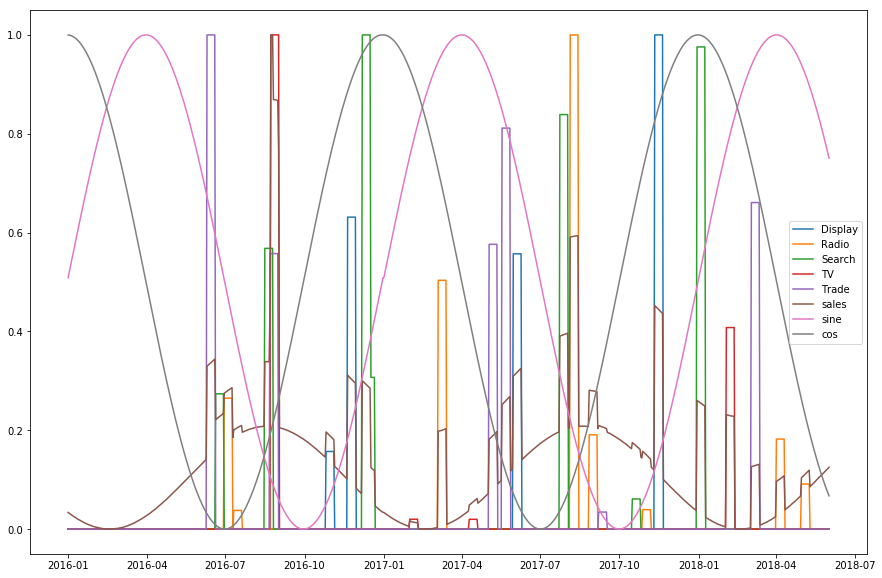

In [91]:
view_brand(data_viewed, 'Caffeinos')